## Assignment 6 (DA-2)
### Problem Statement: Download Pima Indians Diabetes dataset. Use Naive Bayes Algorithm for classification Load the data from CSV file and split it into training and test datasets. Summarize the properties in the training dataset so that we can calculate probabilities and make predictions. Classify samples from a test dataset and a summarized training dataset.

#### Name: Rohit Kulkarni
#### Roll No: 41346
#### Batch: R3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(color_codes = True)

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.isnull().values.any()

False

## There are no NULL values, but 0 values do exist, following steps have been taken to replace them:

In [ ]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['BMI'].fillna(df['BMI'].mean(), inplace = True)

In [ ]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Splitting Data into Training and Testing sets

In [ ]:
y = df['Outcome']
x = df.drop(['Outcome'],axis=1)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,3.726257,120.849162,69.685289,20.432030,79.836127,31.975605,0.469920,33.074488
std,3.262965,32.339523,18.094374,15.490715,115.196730,7.624495,0.342087,11.685319
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,26.800000,0.241000,24.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000
75%,6.000000,139.000000,80.000000,32.000000,129.000000,36.500000,0.612000,41.000000
max,17.000000,199.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
train_mean_pos = x_train[y_train==1].mean()
train_std_pos = x_train[y_train==1].std()
train_mean_neg = x_train[y_train==0].mean()
train_std_neg = x_train[y_train==0].std()

## Build a model without using built-in model for Naive Bayes

In [ ]:
from math import sqrt
from math import pi
from math import exp

def cond_probability(x, mean, std):
    exponent = exp(-((x - mean)**2/(2*std**2)))
    return (1 / (sqrt(2*pi)*std)) * exponent

In [ ]:
def predict(row):
    prob_pos = len(x_train[y_train==1]) / len(x_train)
    
    for i in range(0,len(row)):
        prob_pos = prob_pos * cond_probability(row[i],train_mean_pos[i],train_std_pos[i])
        
    prob_neg = len(x_train[y_train==0]) / len(x_train)
    
    for i in range(0,len(row)):
        prob_neg = prob_neg * cond_probability(row[i],train_mean_neg[i],train_std_neg[i])    
    
    return [prob_pos,prob_neg]

In [ ]:
predictions_raw = []

for row in x_test.values.tolist():
    predictions_raw.append(predict(row))

In [ ]:
predictions_raw[0]

[2.1594739877127143e-13, 6.134017554978718e-13]

In [ ]:
predictions = []
for row in predictions_raw:
    if(row[0]>row[1]):
        predictions.append(1)
    else:
        predictions.append(0)

###### Accuracy

In [ ]:
print("Accuracy Score of the model is: ",accuracy_score(y_test.tolist(),predictions)*100,"%")

Accuracy Score of the model is:  74.45887445887446 %


###### Confusion Matrix

In [ ]:
nbConfusion = confusion_matrix(y_test.tolist(),predictions)

In [ ]:
nbConfusion

array([[119,  32],
       [ 27,  53]])

<AxesSubplot:>

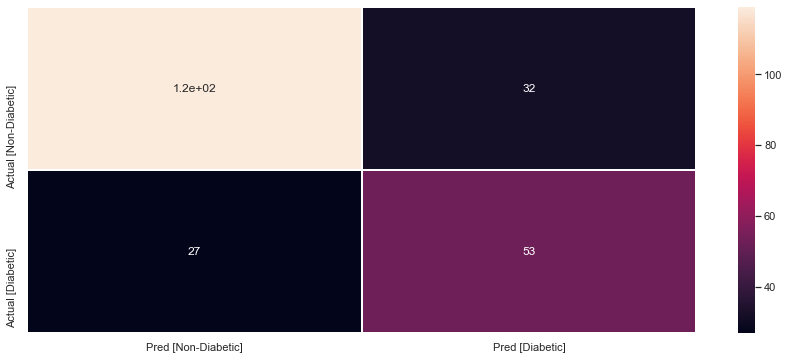

In [ ]:
ylabel = ["Actual [Non-Diabetic]","Actual [Diabetic]"]
xlabel = ["Pred [Non-Diabetic]","Pred [Diabetic]"]
plt.figure(figsize=(15,6))
sns.heatmap(nbConfusion, annot=True, xticklabels = xlabel, yticklabels = ylabel, linecolor='white', linewidths=1)

In [ ]:
TP = nbConfusion[1, 1]
TN = nbConfusion[0, 0]
FP = nbConfusion[0, 1]
FN = nbConfusion[1, 0]

In [ ]:
Precision = TP / (TP + FP)
Recall = TP / (TP + FN)
Specificity = TN / (TN + FP)
f1 = (2*Precision*Recall)/(Precision+Recall)

print("Precision: ", Precision)
print("Recall (Sensitivity): ", Recall)
print("Specificity: ", Specificity)
print("F1 Score: ", f1)

Precision:  0.6235294117647059
Recall (Sensitivity):  0.6625
Specificity:  0.7880794701986755
F1 Score:  0.6424242424242423
